In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment, ParametrizedRandomExperiment
# import pandas as pd
import modin.pandas as pd
import modin.config as modin_cfg

modin_cfg.Engine.put("dask")  # Modin will use Dask
modin_cfg.StorageFormat.put('pandas')

from distributed import Client

client = Client()


import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance
from sklearn.preprocessing import OneHotEncoder
import ast
import math

def encode_maze(maze):
    num_rows = len(maze)
    num_cols = len(maze[0])

    encoded_maze = []

    for i in range(num_rows):
        for j in range(num_cols):
            if maze[i][j] == 'S':
                encoded_maze.append(0)
            elif maze[i][j] == 'F':
                encoded_maze.append(1)
            elif maze[i][j] == 'H':
                encoded_maze.append(2)
            elif maze[i][j] == 'G':
                encoded_maze.append(3)
            elif maze[i][j] == 'E':
                encoded_maze.append(4)
    return encoded_maze

def add_padding(map, target_size):
    current_size = len(map)
    diff = target_size - current_size
    if diff < 0:
        raise Exception("Current map size is greater than target size")
    elif diff == 0:
        return map
    else:
        result = []
        padding = diff // 2
        left_out = diff % 2
        for i in range(padding):
            result.append('E' * target_size)
        for row in map:
            new_row = 'E' * padding + row + 'E' * padding + 'E' * left_out
            result.append(new_row)
        for i in range(padding + left_out):
            result.append('E' * target_size)
        return result
    
def encode_map(map, categories='auto'):
    # Convert the map to a 2D array
    map_array =  []
    for row in map:
        for letter in row:
            map_array.append([letter])
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder(sparse=False, categories=categories)

    # Fit and transform the map array
    encoded_map = encoder.fit_transform(map_array).astype('int64')

    # Get the categories (unique values) from the encoder
    categories = encoder.categories_[0]

    # Create a dictionary to map the encoded values to the original categories
    category_mapping = {i: category for i, category in enumerate(categories)}

    # Return the encoded map and the category mapping
    return encoded_map, encoder.categories_, category_mapping

            

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


AttributeError: 'str' object has no attribute 'decode'

In [2]:
import ast
directory = "../datasets/FrozenLake-v1_m4-4_s1-100_t1_total-random/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()
print(dataset_names)

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

dataset = dataset.rename(columns={'Simulations': 'Empty', 'Temperature': 'Simulations'})
#save dataset as csv    

padding = 4


if 'Map' in dataset.columns:
    if padding > 0: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval).apply(lambda x: add_padding(x, padding))
    else: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval)
    #dataset['F_count'] = dataset['Map'].apply(lambda x: sum(row.count('F') for row in x))
    dataset['Encoded_Map'] = dataset['List_Map'].apply(lambda x: encode_maze(x))
    categories = encode_map(dataset['List_Map'].iloc[0])[1]
    print(categories)
    #dataset['OneHotEncoded_Map'] = dataset['List_Map'].apply(lambda x: np.reshape(encode_map(x, categories)[0], (-1)))
    
dataset.to_csv(directory + "total.csv", index=False)
print(dataset)
dataset.describe()

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



AttributeError: 'str' object has no attribute 'decode'

In [43]:
lan = dataset['OneHotEncoded_Map'].apply(pd.Series).values

In [44]:
print(dataset["Map"].iloc[635524])
print(dataset["OneHotEncoded_Map"].iloc[635524].shape)
print(lan[635524])

['SFFF', 'FFFF', 'FFFF', 'FFFG']
(64,)
[0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0]


In [25]:
i = 0
for encoded_map in lan:
    for code in encoded_map:
        if not code >= 0:
            print(i)
            pass
    i+=1

635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635524
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
635944
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
636510
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
637607
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638104
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
638130
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
641021
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
643488
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150
644150

In [3]:
models = {
    #'LinearRegression': LinearRegression(),
    # #'Ridge': Ridge(alpha=1.0),
    # #'Lasso': Lasso(alpha=1.0),
    # #'ElasticNet':  ElasticNet(alpha=1.0, l1_ratio=0.5),
    #'SVR': SVR(),
    #'DecisionTreeRegressor': DecisionTreeRegressor(),
    #'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=200, max_depth=20),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(150, 150, 150), activation='tanh', max_iter=1000000, n_iter_no_change=10, tol=1e-4)
}

## Analysis

In [32]:
# Checking some errors
a = dataset.groupby(["Map", "Simulations"])["Discounted Return"]
print(a.describe())
errors = a.std() / (a.count() ** 0.5)
print(errors.describe())
errors = errors[errors > 0.05]
print(len(errors))
print(type(errors))
# for index, vals in errors.items():
#     print(index[0], index[1], vals)

                                              count      mean       std  \
Map                              Simulations                              
['SFFF', 'FFFF', 'FFFF', 'FFFG'] 1             13.0  0.846498  0.258994   
                                 2             17.0  0.926593  0.042167   
                                 3             21.0  0.933797  0.050768   
                                 4              9.0  0.956839  0.023844   
                                 5             12.0  0.960221  0.020912   
...                                             ...       ...       ...   
['SHHH', 'FHHH', 'FHHH', 'FFFG'] 96            15.0  0.962156  0.023260   
                                 97            11.0  0.966521  0.013521   
                                 98            17.0  0.965581  0.024814   
                                 99            12.0  0.972635  0.009675   
                                 100           16.0  0.971169  0.008852   

                        

Simulations
1      0.026310
2      0.088273
3      0.151683
4      0.131326
5      0.113502
6      0.180811
7      0.232815
8      0.248135
9      0.242551
10     0.280623
11     0.321213
12     0.328968
13     0.338731
14     0.365107
15     0.405039
16     0.417485
17     0.420069
18     0.444652
19     0.475693
20     0.483755
21     0.467933
22     0.484806
23     0.492873
24     0.507925
25     0.492836
26     0.531229
27     0.571151
28     0.559937
29     0.552251
30     0.590000
31     0.627256
32     0.621281
33     0.623331
34     0.642902
35     0.653639
36     0.644723
37     0.635336
38     0.647105
39     0.659271
40     0.649875
41     0.644883
42     0.686074
43     0.704514
44     0.701264
45     0.681053
46     0.712147
47     0.732117
48     0.736802
49     0.717147
50     0.740476
51     0.737661
52     0.751775
53     0.751076
54     0.745210
55     0.747409
56     0.758451
57     0.769004
58     0.769416
59     0.774132
60     0.792176
61     0.785471
62     0.801

<ErrorbarContainer object of 3 artists>

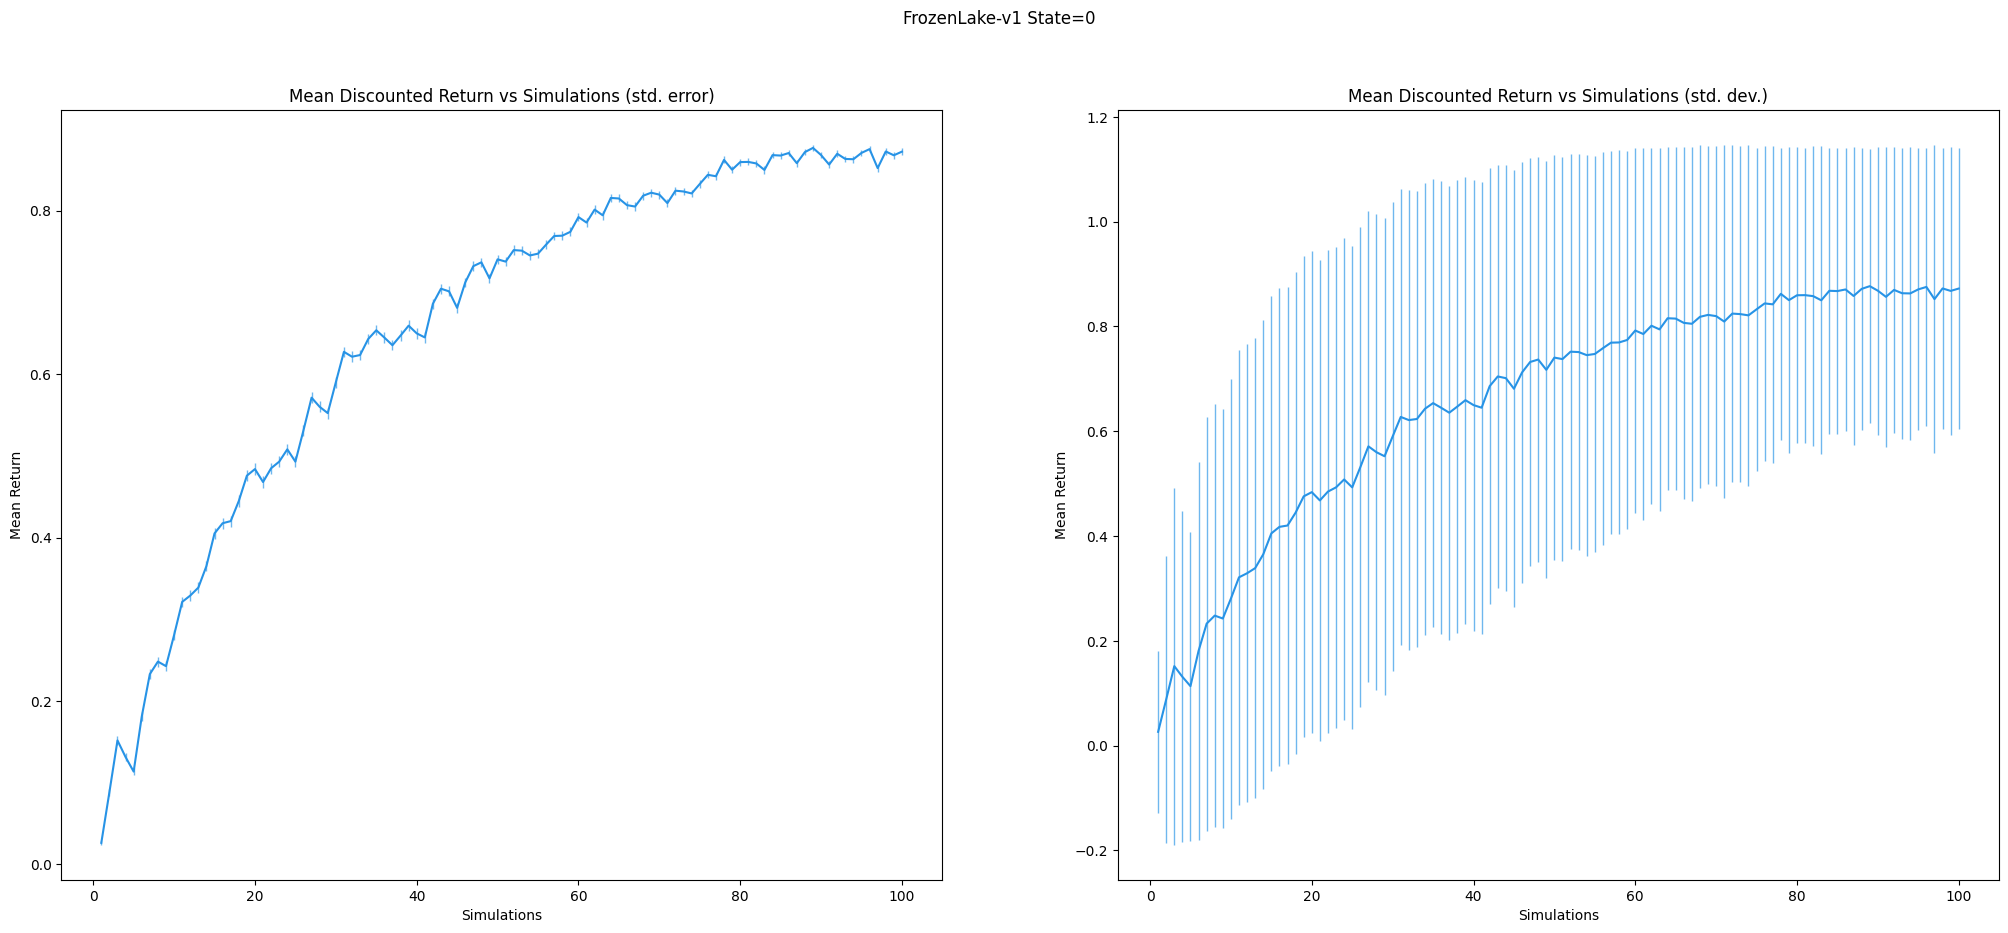

In [92]:
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Discounted Return"].mean()
std_returns = group_simulation["Discounted Return"].std()
error_returns = std_returns / (group_simulation["Discounted Return"].count() ** 0.5)

print(mean_returns.to_string())
print(error_returns.to_string())

#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)
#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('FrozenLake-v1 State=0')
fig.set_size_inches(25, 10)

ax1.set_title("Mean Discounted Return vs Simulations (std. error)")
ax2.set_title("Mean Discounted Return vs Simulations (std. dev.)")
ax1.xaxis.set_label_text("Simulations")
ax1.yaxis.set_label_text("Mean Return")
ax2.xaxis.set_label_text("Simulations")
ax2.yaxis.set_label_text("Mean Return")

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

<AxesSubplot:xlabel='Initial State'>

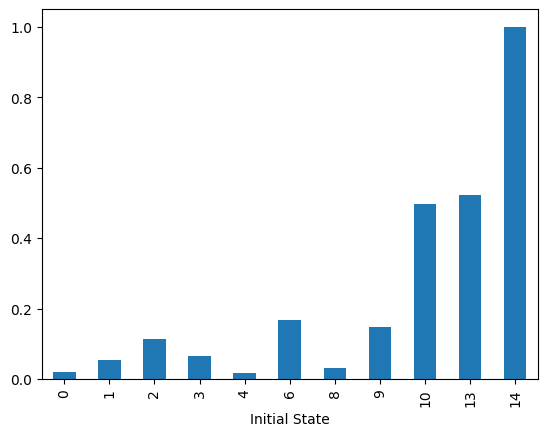

In [40]:
sim = 5
grouped = dataset[dataset["Simulations"] == sim].groupby("Initial State")["Discounted Return"]
grouped.mean().plot.bar()

In [14]:
discount = 0.997
add = 1
total = 0
for i in range(500):
    total += add
    add *= discount
print(total)

259.12410747446273


## Without Maps

### Without Initial State

Training set size: 100
Training error 1: 0.000002 ± 0.000000
Training error 2: 2608.831293 ± 69.821435
Test error: 2261.239302 ± 239.324762



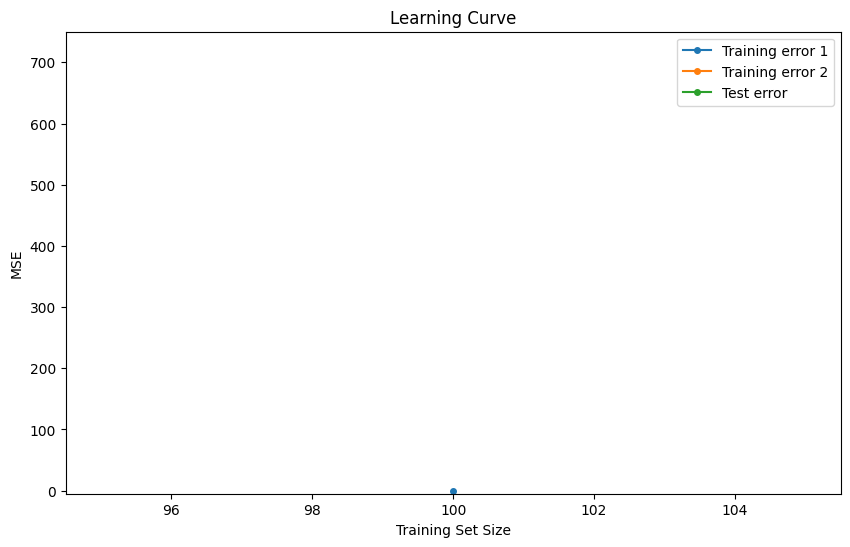

In [106]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations', 'Pole Angle', 'Pole Angular Velocity', 'Cart Position', 'Cart Velocity']

#Folds
fold = 2
#test_sims = np.sort(np.random.choice(np.arange(sim_min, sim_max + 1), size=math.ceil((sim_max - sim_min + 1) * 0.33), replace=False))
test_sims = [ 3, 5, 9, 13, 14, 18, 21, 25, 26, 27, 29, 38, 41, 43, 47, 48, 53, 55, 59, 60, 65, 67, 69, 70, 75, 78, 84, 85, 86, 89, 90, 96, 98]
#Creating test set by taking average for test set simulations
test_set = dataset[dataset['Simulations'].isin(test_sims)].groupby(features)['Discounted Return'].mean()
data = test_set.index.values

if len(features) > 1:
    test_set_x = [[i for i in x] for x in data]
else: 
    test_set_x = data.reshape(-1, 1)

# test_set_x = np.hstack((categorical_values, numerical_values))
# test_set_x = test_set.index.values.reshape(-1, len(features))
test_set_y = test_set.values


#train_sizes = list(range(100, 1001, 125)) + list(range(1000, 5001, 250)) + [10000, 20000, 40000, 80000]
train_sizes = [100]
train_scores = []
train_scores2 = []
test_scores = []

for training_set_size in  train_sizes:
    train_scores.append([])
    train_scores2.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Randomly sampling number of simulations to be included in the test and training set
        training_sims = np.setdiff1d(np.arange(sim_min, sim_max + 1), test_sims)
        
        #Creating training set by sampling sim numbers for training set from the remainnig datapoints
        training_set = dataset[dataset['Simulations'].isin(training_sims)].sample(n=training_set_size, replace=True)
        
        training_set_x = training_set[features].values.reshape(-1, len(features))
        training_set_y = training_set['Discounted Return'].values
        
        #Creating training score sets
        training_score_set = training_set.groupby(features)['Discounted Return'].mean()
        data = training_score_set.index.values
        if len(features) > 1:
            training_score_set_x = [[i for i in x] for x in data]
        else: 
            training_score_set_x = data.reshape(-1, 1)
        # training_score_set_x = training_score_set.index.values.reshape(-1, len(features))
        training_score_set_y = training_score_set.values
        
        training_score_set2 = dataset[dataset['Simulations'].isin(training_sims)].groupby(features)['Discounted Return'].mean()
        data = training_score_set2.index.values
        if len(features) > 1:
            training_score_set2_x = [[i for i in x] for x in data]
        else: 
            training_score_set2_x = data.reshape(-1, 1)
        training_score_set2_y = training_score_set2.values
        # print(test_sims)
        # print(training_score_set)
        # print(training_score_set_x.shape)
        # print(training_score_set_y.shape)

        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            #Calculating MSE
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            #Predicting on training set
            y_pred = model.predict(training_score_set_x)
            train_score = mean_squared_error(training_score_set_y, y_pred)
            train_scores[-1].append(train_score)
            
            y_pred = model.predict(training_score_set2_x)
            train_score2 = mean_squared_error(training_score_set2_y, y_pred)
            train_scores2[-1].append(train_score2)
    print("Training set size: %d\nTraining error 1: %f ± %f\nTraining error 2: %f ± %f\nTest error: %f ± %f\n" % (training_set_size, np.mean(train_scores[-1]), np.std(train_scores[-1]) / (fold ** 0.5), np.mean(train_scores2[-1]), np.std(train_scores2[-1]) / (fold ** 0.5), np.mean(test_scores[-1]), np.std(test_scores[-1]) / (fold ** 0.5)))
        
# Calculate the mean and standard deviation of the training and test scores
train1_mean = np.mean(train_scores, axis=1)
train1_std = np.std(train_scores, axis=1) / (fold ** 0.5)
train2_mean = np.mean(train_scores2, axis=1)
train2_std = np.std(train_scores2, axis=1) / (fold ** 0.5)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1) / (fold ** 0.5)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, marker='o', markersize=4, label='Training error 1')
plt.plot(train_sizes, train2_mean, marker='o', markersize=4, label='Training error 2')
plt.plot(train_sizes, test_mean, marker='o', markersize=4, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([-5, 750])
plt.show()

In [102]:
#Getting min and max number of simulations
model = GradientBoostingRegressor(n_estimators=100, max_depth=10)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=500, activation='tanh', input_shape=(1,)),
#     tf.keras.layers.Dense(units=500, activation='tanh'),
#     tf.keras.layers.Dense(units=500, activation='tanh'),
#     tf.keras.layers.Dense(units=500, activation='tanh'),
#     tf.keras.layers.Dense(units=500, activation='tanh'),
#     tf.keras.layers.Dense(units=1)
# ])
# model.compile(optimizer='adam', loss='mean_squared_error')
#Features to be used in the model
features = ['Simulations', 'Pole Angle', 'Pole Angular Velocity', 'Cart Position', 'Cart Velocity']

test_sims = [ 3, 5, 9, 13, 14, 18, 21, 25, 26, 27, 29, 38, 41, 43, 47, 48, 53, 55, 59, 60, 65, 67, 69, 70, 75, 78, 84, 85, 86, 89, 90, 96, 98]
training_sims = np.setdiff1d(np.arange(sim_min, sim_max + 1), test_sims)
training_set_size = 100000

fold = 10

test_set = dataset[dataset['Simulations'].isin(test_sims)].groupby(features)['Discounted Return'].mean()
data = test_set.index.values
if len(features) > 1:
    test_set_x = [[i for i in x] for x in data]
else: 
    test_set_x = data.reshape(-1, 1)

test_set_y = test_set.values
errors = dataset[dataset['Simulations'].isin(test_sims)].groupby(features)['Discounted Return'].std() / (dataset[dataset['Simulations'].isin(test_sims)].groupby(features)['Discounted Return'].count() ** 0.5)
print(errors.describe())

sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

validation_errors = []
validation_errors_abs = []
prediction_list = []

for i in range(fold):
    training_set = dataset[dataset['Simulations'].isin(training_sims)].sample(n=training_set_size, replace=True)
    training_set_x = training_set[features].values.reshape(-1, len(features))
    training_set_y = training_set['Discounted Return'].values

    model.fit(training_set_x, training_set_y)
    #model.fit(training_set_x, training_set_y, verbose=1)
    predictions = model.predict(test_set_x)
    prediction_list.append(predictions)
    validation_errors.append(mean_squared_error(test_set_y, predictions))
    validation_errors_abs.append(mean_absolute_error(test_set_y, predictions))
    if (i+1) % 10 == 0:
        print("Fold: %d / %d" % (i + 1, fold))

validation_error = np.mean(validation_errors)
std_error = np.std(validation_errors) / (fold ** 0.5)

validation_error_abs = np.mean(validation_errors_abs)
std_error_abs = np.std(validation_errors_abs) / (fold ** 0.5)
print("MSE: %f ± %f" % (validation_error, std_error))
print("MAE: %f ± %f" % (validation_error_abs, std_error_abs))

count    78538.000000
mean        14.412920
std         15.056975
min          0.000000
25%          0.903926
50%         10.319455
75%         22.582326
max        125.115677
Name: Discounted Return, dtype: float64
Fold: 10 / 10
MSE: 911.965808 ± 1.545169
MAE: 21.968254 ± 0.015891


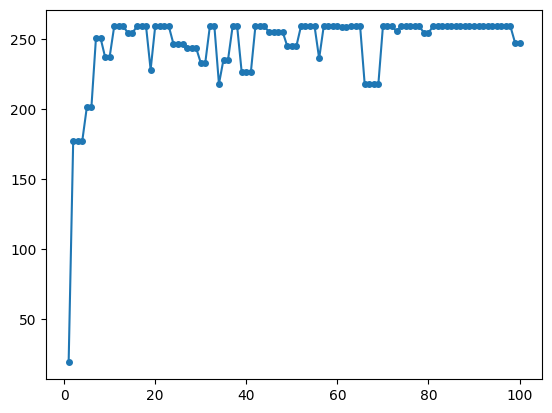

In [19]:
all_sims = np.array(range(1, 101, 1))
predictions = model.predict(all_sims.reshape(-1, 1))

plt.plot(all_sims, predictions, marker='o', markersize=4, label='Predictions')

In [ ]:
test_x = dataset[dataset['Simulations'].isin(all_sims)][features].values.reshape(-1, len(features))
test_y = dataset[dataset['Simulations'].isin(all_sims)]['Discounted Return'].values

In [24]:
all_sims = np.array(range(1, 101, 1))
test_x = dataset[dataset['Simulations'].isin(all_sims)][features].values.reshape(-1, len(features))
test_y = dataset[dataset['Simulations'].isin(all_sims)]['Discounted Return'].values

predictions = model.predict(test_x)
r2score = r2_score(test_y, predictions)
mse = mean_squared_error(test_y, predictions)

print("R2 Score: %f\nMSE: %f" % (r2score, mse))

R2 Score: 0.204698
MSE: 1985.679446


In [27]:
all_sims = np.array(range(1, 101, 1))
test_x = dataset[dataset['Simulations'].isin(all_sims)][features].values.reshape(-1, len(features))
test_y = dataset[dataset['Simulations'].isin(all_sims)]['Discounted Return'].values

predictions = model.predict(test_x)
r2score = r2_score(test_y, predictions)
mse = mean_squared_error(test_y, predictions)

print("R2 Score: %f\nMSE: %f" % (r2score, mse))

R2 Score: 0.625059
MSE: 936.138359


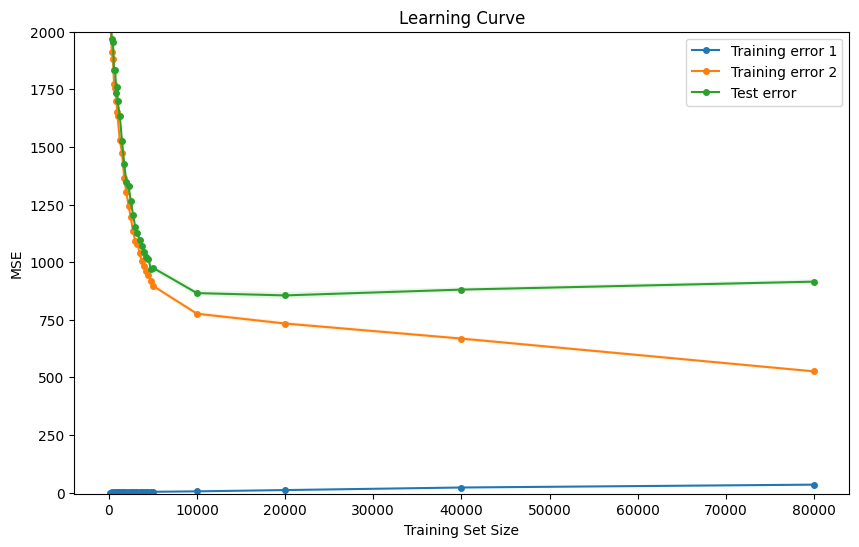

In [15]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, marker='o', markersize=4, label='Training error 1')
plt.plot(train_sizes, train2_mean, marker='o', markersize=4, label='Training error 2')
plt.plot(train_sizes, test_mean, marker='o', markersize=4, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([-5, 2000])
plt.show()

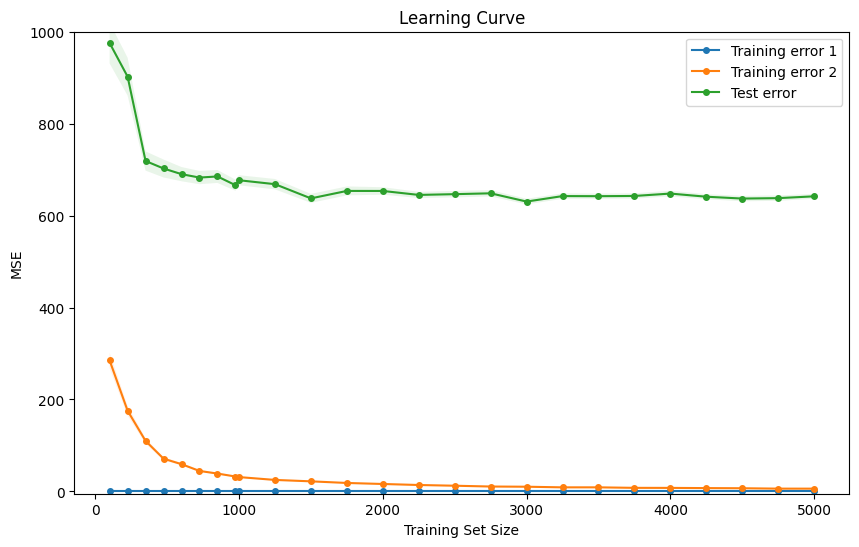

In [93]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, marker='o', markersize=4, label='Training error 1')
plt.plot(train_sizes, train2_mean, marker='o', markersize=4, label='Training error 2')
plt.plot(train_sizes, test_mean, marker='o', markersize=4, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([-5, 1000])
plt.show()

### With initial state

Training set size: 10
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.036031 ± 0.008812
Test error: 0.041237 ± 0.027283

Training set size: 135
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.025642 ± 0.007660
Test error: 0.034998 ± 0.008465

Training set size: 260
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.033559 ± 0.003783
Test error: 0.052412 ± 0.003765

Training set size: 385
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.023001 ± 0.005359
Test error: 0.027772 ± 0.004432

Training set size: 510
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.020846 ± 0.004447
Test error: 0.031694 ± 0.009491

Training set size: 635
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.021697 ± 0.006988
Test error: 0.035539 ± 0.005417

Training set size: 760
Training error 1: 0.000001 ± 0.000000
Training error 2: 0.023665 ± 0.001626
Test error: 0.034955 ± 0.014042

Training set size: 885
Training error 1: 0.000001 ± 0.000001
Training error 2

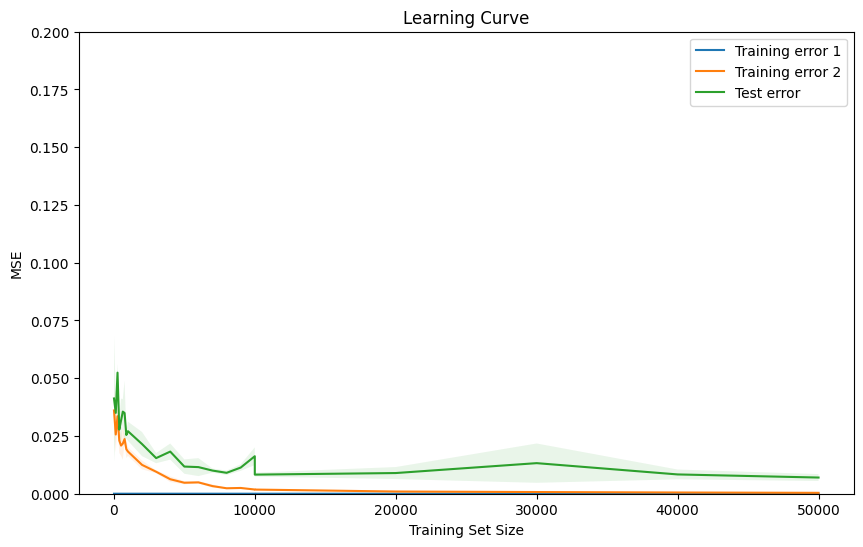

In [35]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations', 'Initial State']

#Unique states
unique_states = []
for state in dataset["Initial State"].unique():
    unique_states.append(state)
state_count = len(unique_states)

#Folds
fold = 3

train_sizes = list(range(10, 1001, 125)) + list(range(1000, 10001, 1000)) + list(range(10000, 50001, 10000))
train_scores1 = []
train_scores2 = []
test_scores = []

for training_set_size in  train_sizes:
    train_scores1.append([])
    train_scores2.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Randomly sampling number of simulations to be included in the test and training set
        test_states = np.sort(np.random.choice(unique_states, size=math.ceil(state_count * 0.33), replace=False))
        #training_sims = np.setdiff1d(np.arange(sim_min, sim_max + 1), test_sims)

        #Creating test set by taking average for test set simulations
        test_set = dataset[dataset['Initial State'].isin(test_states)].groupby(["Simulations", "Initial State"]).mean()["Discounted Return"]
        #test_set_x = test_set.groupby(['Simulations', 'Initial State']).mean()[features].values.reshape(-1, len(features))
        #test_set_y = dataset.loc[dataset['Initial State'].isin(test_states)].groupby(['Simulations', 'Initial State']).mean()['Discounted Return'].values
        test_set_x = []
        test_set_y = []
        for i in range(len(test_set)):
            test_set_x.append([test_set.index[i][0], test_set.index[i][1]])
            test_set_y.append(test_set.values[i])
        #Creating training set by sampling sim numbers for training set from the remainnig datapoints
        training_set = dataset[~dataset['Initial State'].isin(test_states)]
        training_set_sampled = training_set.sample(n=training_set_size, replace=True)
        
        training_set_x = training_set_sampled[features].values.reshape(-1, len(features))
        training_set_y = training_set_sampled['Discounted Return'].values
        
        # Training score 1 set
        training_score1_set = training_set_sampled.groupby(["Initial State", "Simulations"]).mean()["Discounted Return"]
        training_score1_set_x = []
        training_score1_set_y = []
        for i in range(len(training_score1_set)):
            training_score1_set_x.append([training_score1_set.index[i][1], training_score1_set.index[i][0]])
            training_score1_set_y.append(training_score1_set.values[i])
            
        #Creating Training Score 2 Set - Looking all datapoints in the training sample
        training_sampled_unique = training_set_sampled["Initial State"].unique()
        training_score2_set = training_set[training_set["Initial State"].isin(training_sampled_unique)].groupby(["Initial State", "Simulations"]).mean()["Discounted Return"]
        training_score2_set_x = []
        training_score2_set_y = []
        for i in range(len(training_score2_set)):
            training_score2_set_x.append([training_score2_set.index[i][1], training_score2_set.index[i][0]])
            training_score2_set_y.append(training_score2_set.values[i])
        # print(test_sims)
        # print(training_score_set)
        # print(training_score_set_x.shape)
        # print(training_score_set_y.shape)

        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            
            #Predicting on training score 1 set
            y_pred = model.predict(training_score1_set_x)
            train_score1 = mean_squared_error(training_score1_set_y, y_pred)
            train_scores1[-1].append(train_score1)
            
            #Predicting on training score 2 set
            y_pred = model.predict(training_score2_set_x)
            train_score2 = mean_squared_error(training_score2_set_y, y_pred)
            train_scores2[-1].append(train_score2)
            
        # print("Fold: %d\nTraining set size: %d\nTraining error: %f\nTest error: %f\n" % (i, training_set_size, train_score, test_score))
    print("Training set size: %d\nTraining error 1: %f ± %f\nTraining error 2: %f ± %f\nTest error: %f ± %f\n" % (training_set_size, np.mean(train_scores1[-1]), np.std(train_scores1[-1]), np.mean(train_scores2[-1]), np.std(train_scores2[-1]), np.mean(test_scores[-1]), np.std(test_scores[-1])))
        
# Calculate the mean and standard deviation of the training and test scores
train1_mean = np.mean(train_scores1, axis=1)
train1_std = np.std(train_scores1, axis=1)
train2_mean = np.mean(train_scores2, axis=1)
train2_std = np.std(train_scores2, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, label='Training error 1')
plt.plot(train_sizes, train2_mean, label='Training error 2')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([0.0, 0.1])
plt.show()

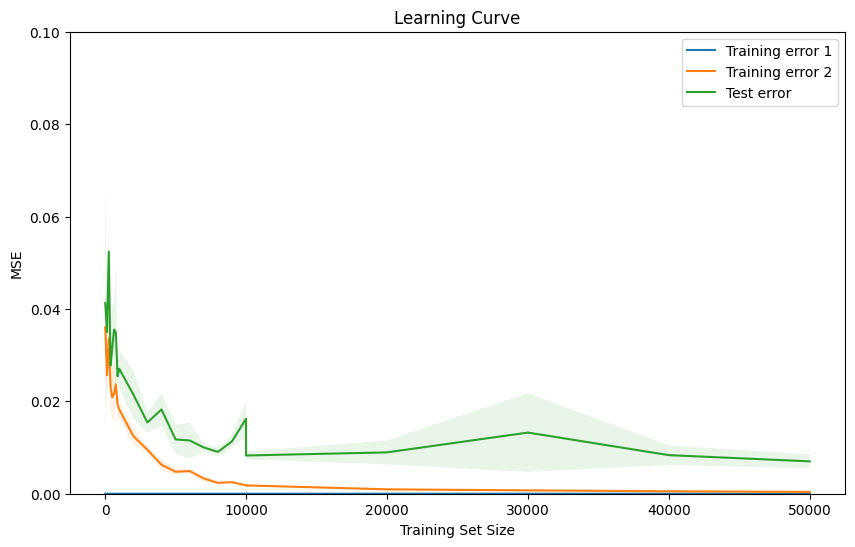

In [36]:
# Calculate the mean and standard deviation of the training and test scores
train1_mean = np.mean(train_scores1, axis=1)
train1_std = np.std(train_scores1, axis=1)
train2_mean = np.mean(train_scores2, axis=1)
train2_std = np.std(train_scores2, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, label='Training error 1')
plt.plot(train_sizes, train2_mean, label='Training error 2')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([0.0, 0.1])
plt.show()

## With Different Maps

In [19]:
training_set_size = 75000

#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)
test_maps = np.random.default_rng().choice(unique_maps, size=500, replace=False)
print("Total unique: ", map_count)

#Creating Test Set
test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
test_set_x = []
test_set_y = []
print(type(test_set))
for i in range(len(test_set)):
    test_set_x.append([test_set.index[i][1]] + encode_maze(test_set.index[i][0]))
    test_set_y.append(test_set[i])

#Creating Training Set
training_set = dataset[~dataset['Map'].isin(test_maps)]
training_set_sampled = training_set.sample(n=training_set_size, replace=False)
training_set_x = np.append(training_set_sampled["Simulations"].values.reshape(-1, 1), training_set_sampled['Encoded_Map'].apply(pd.Series).values, axis=1)
training_set_y = training_set_sampled["Discounted Return"].values

#Creating Training Score Set
training_score_set = training_set.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
training_score_set_x = []
training_score_set_y = []
for i in range(len(training_score_set)):
    training_score_set_x.append([training_score_set.index[i][1]] + encode_maze(training_score_set.index[i][0]))
    training_score_set_y.append(training_score_set[i])

#Creating Training Score 2 Set - Looking all datapoints in the training sample
training_sampled_unique = training_set_sampled["Map"].unique()
training_score2_set = training_set[training_set["Map"].isin(training_sampled_unique)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
training_score2_set_x = []
training_score2_set_y = []
for i in range(len(training_score2_set)):
    training_score2_set_x.append([training_score2_set.index[i][1]] + encode_maze(training_score2_set.index[i][0]))
    training_score2_set_y.append(training_score2_set[i])


print("Training unique: ", len(training_sampled_unique))
print("Test uniuqe: ", len(test_maps))
print("Missing: ", map_count - len(training_sampled_unique) - len(test_maps))
print("Training score2 set: ", len(training_score2_set))

#test_set.describe()
# print(training_score_set_x)
print(len(test_set_y))

Total unique:  3828
<class 'pandas.core.series.Series'>


KeyboardInterrupt: 

In [17]:
print("Missing: ", len(dataset) - len(dataset[dataset['Map'].isin(test_maps)]) - len(training_score2_set))

Missing:  0


In [11]:
#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    if len(ast.literal_eval(map)) == 4:
        unique_maps.append(map)
map_count = len(unique_maps)
print("Number of unique maps: ", map_count)

Number of unique maps:  3828


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(17, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 200)
        self.fc4 = nn.Linear(200, 200)
        self.fc5 = nn.Linear(200, 200)
        self.fc6 = nn.Linear(200, 1)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = self.fc6(x)
        return x
    
    def predict(self, x):
        with torch.no_grad():
            return self(torch.tensor(x, dtype=torch.float32))

started training
Finished epoch 0, latest loss 0.7938634753227234
Finished epoch 100, latest loss 0.09780406206846237
Finished epoch 200, latest loss 0.09086457639932632
Finished epoch 300, latest loss 0.08702642470598221
Finished epoch 400, latest loss 0.11668266355991364
Finished epoch 500, latest loss 0.08749949187040329
Finished epoch 600, latest loss 0.10323642939329147
Finished epoch 700, latest loss 0.10091610997915268
Finished epoch 800, latest loss 0.11328084766864777
Finished epoch 900, latest loss 0.0741056501865387
Finished epoch 1000, latest loss 0.0685635507106781
Finished epoch 1100, latest loss 0.06815484911203384
Finished epoch 1200, latest loss 0.07096438109874725
Finished epoch 1300, latest loss 0.07004795968532562
Finished epoch 1400, latest loss 0.06892318278551102
Finished epoch 1500, latest loss 0.06494253128767014
Finished epoch 1600, latest loss 0.07204942405223846
Finished epoch 1700, latest loss 0.06596805155277252
Finished epoch 1800, latest loss 0.067313313

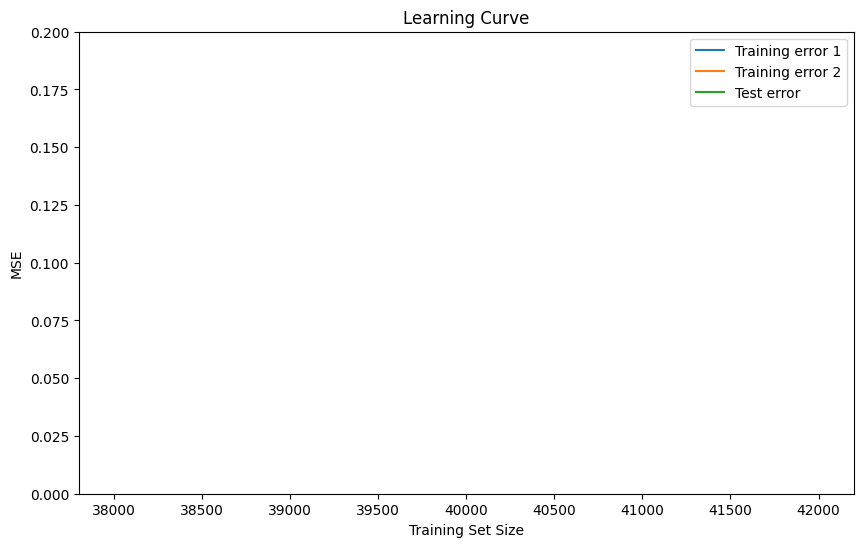

In [77]:
import pickle
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)
categories = encode_map(dataset['List_Map'].iloc[0])[1]

#Folds
fold = 1
one_hot = False
NN = True

#Test set size
test_set_size = math.ceil((map_count * 0.33))
#test_set_size = len(unique_maps) - 50
#Train set sizes
#train_sizes = [1, 8, 16, 25, 75, 100, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 30000, 60000, 100000, 150000, 200000, 250000, 300000]
#train_sizes = train_sizes = list(range(10, 1000, 125)) + list(range(1000, 10000, 1000))
train_sizes = [40000]
#train_sizes = [1, 25, 100]

train_scores1 = []
train_scores2 = []
test_scores = []


#Creating Test Set
test_maps = np.random.default_rng().choice(unique_maps, size=test_set_size, replace=False)
test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
test_set_x = []
test_set_y = []
for j in range(len(test_set)):
    if one_hot:
        test_set_x.append([test_set.index[j][1]] + list(np.reshape(encode_map(add_padding(ast.literal_eval(test_set.index[j][0]), padding), categories=categories)[0], (-1))))
    else:
        test_set_x.append([test_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(test_set.index[j][0]), padding)))
    test_set_y.append(test_set[j])
categories = encode_map(dataset['List_Map'].iloc[0])[1]

final_model = None

for training_set_size in  train_sizes:
    train_scores1.append([])
    train_scores2.append([])
    test_scores.append([])
    
    for i in range(fold):

        #Creating Training Set
        training_set = dataset[~dataset['Map'].isin(test_maps)]
        training_set_sampled = training_set.sample(n=training_set_size, replace=False)
        if one_hot:
            training_set_x = np.append(training_set_sampled["Simulations"].values.reshape(-1, 1), training_set_sampled['OneHotEncoded_Map'].apply(pd.Series).values, axis=1).astype('int64')
        else:
            training_set_x = np.append(training_set_sampled["Simulations"].values.reshape(-1, 1), training_set_sampled['Encoded_Map'].apply(pd.Series).values, axis=1)
        training_set_y = training_set_sampled["Discounted Return"].values
        
        #print("Maps seen in training: %d" % (len(training_set["Map"].unique())))
        #Creating Training Score 1 Set - Looking only sampled points
        training_score1_set = training_set_sampled.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score1_set_x = []
        training_score1_set_y = []
        for j in range(len(training_score1_set)):
            if one_hot:
                training_score1_set_x.append([training_score1_set.index[j][1]] + list(np.reshape(encode_map(add_padding(ast.literal_eval(training_score1_set.index[j][0]), padding), categories=categories)[0], (-1))))
            else:
                training_score1_set_x.append([training_score1_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(training_score1_set.index[j][0]), padding)))
            training_score1_set_y.append(training_score1_set[j])
            
        #Creating Training Score 2 Set - Looking all datapoints in the training sample
        training_sampled_unique = training_set_sampled["Map"].unique()
        training_score2_set = training_set[training_set["Map"].isin(training_sampled_unique)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score2_set_x = []
        training_score2_set_y = []
        for i in range(len(training_score2_set)):
            if one_hot:
                training_score2_set_x.append([training_score2_set.index[j][1]] + list(np.reshape(encode_map(add_padding(ast.literal_eval(training_score2_set.index[j][0]), padding), categories=categories)[0], (-1))))
            else:
                training_score2_set_x.append([training_score2_set.index[i][1]] + encode_maze(training_score2_set.index[i][0]))
            training_score2_set_y.append(training_score2_set[i])


        # print("train score set info: ")
        # a = (training_set.groupby(["Map", "Simulations"]).std()["Discounted Return"] / (training_set.groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(a.mean())
        # print("test set info: ")
        # b = (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).std()["Discounted Return"] / (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(b.mean())
        #Training
        for model_name, model in models.items():
            print("started training")
            if NN:
                model = MyModel()
                loss_fn = nn.MSELoss()
                optimizer = optim.Adam(model.parameters())
                n_epochs = 10000
                batch_size = len(training_set_x)
                
                for epoch in range(n_epochs):
                    for i in range(0, len(training_set_x), batch_size):
                        Xbatch = torch.tensor(training_set_x[i:i+batch_size], dtype=torch.float32)
                        y_pred = model(Xbatch)
                        ybatch = torch.tensor(training_set_y[i:i+batch_size], dtype=torch.float32).reshape(-1, 1)
                        loss = loss_fn(y_pred, ybatch)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                    if epoch % 100 == 0:
                        print(f'Finished epoch {epoch}, latest loss {loss}')
            else:
                model.fit(training_set_x, training_set_y)
                
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            
            #Predicting on training score 1 set
            y_pred = model.predict(training_score1_set_x)
            train_score1 = mean_squared_error(training_score1_set_y, y_pred)
            train_scores1[-1].append(train_score1)
            
            #Predicting on training score 2 set
            y_pred = model.predict(training_score2_set_x)
            train_score2 = mean_squared_error(training_score2_set_y, y_pred)
            train_scores2[-1].append(train_score2)
            final_model = model
            pickle.dump(model, open("../results/pytorch_trials_40k.sav", 'wb'))
            
        # print("Fold: %d\nTraining set size: %d\nTraining error: %f\nTest error: %f\n" % (i, training_set_size, train_score, test_score))
    print("Training set size: %d\nTraining error 1: %f ± %f\nTraining error 2: %f ± %f\nTest error: %f ± %f\n" % (training_set_size, np.mean(train_scores1[-1]), np.std(train_scores1[-1]) / (fold ** 0.5), np.mean(train_scores2[-1]), np.std(train_scores2[-1]) / (fold ** 0.5), np.mean(test_scores[-1]), np.std(test_scores[-1]) / (fold ** 0.5)))
        
# Calculate the mean and standard deviation of the training and test scores
train1_mean = np.mean(train_scores1, axis=1)
train1_std = np.std(train_scores1, axis=1) / (fold ** 0.5)
train2_mean = np.mean(train_scores2, axis=1)
train2_std = np.std(train_scores2, axis=1) / (fold ** 0.5)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1) / (fold ** 0.5)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, label='Training error 1')
plt.plot(train_sizes, train2_mean, label='Training error 2')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([0.0, 0.2])
plt.show()

### Case Study Analysis

In [78]:
model = pickle.load(open("../results/pytorch_trials_40k.sav", 'rb'))

In [79]:
def print_map(map): 
    for row in map:
        print(row)

In [84]:
#case_map = np.random.choice(unique_maps)
#case_map = "['SFHH', 'FHFF', 'FFFF', 'HHHG']"
#case_map = "['SHHH', 'FHFH', 'FFHH', 'FFFG']"
case_map = "['SFFH', 'FFFH', 'HFHF', 'FFFG']"
print_map(ast.literal_eval(case_map))
encoded_case_map = list(np.reshape(encode_maze(add_padding(ast.literal_eval(case_map), padding)), (-1)))
print(encoded_case_map)
print(case_map in test_maps)

SFFH
FFFH
HFHF
FFFG
[0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3]
False


In [58]:
dataset.describe()

,Simulations,Empty,Return,Discounted Return
count,5.551000e+06,5551000.0,5.551000e+06,5.551000e+06
mean,5.050673e+01,0.0,7.306781e-01,6.858087e-01
std,2.886272e+01,0.0,4.436076e-01,4.188949e-01
min,1.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,2.600000e+01,0.0,0.000000e+00,0.000000e+00
50%,5.100000e+01,0.0,1.000000e+00,9.360380e-01
75%,7.600000e+01,0.0,1.000000e+00,9.704018e-01
max,1.000000e+02,0.0,1.000000e+00,9.850897e-01


Average amount each sim tried:  14.21
Simulations
1      13
2      10
3      23
4      13
5      12
       ..
96     17
97     19
98      9
99     17
100    14
Name: Discounted Return, Length: 100, dtype: int64
Simulations
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
96     0.007631
97     0.005539
98     0.015666
99     0.003631
100    0.013605
Name: Discounted Return, Length: 100, dtype: float64


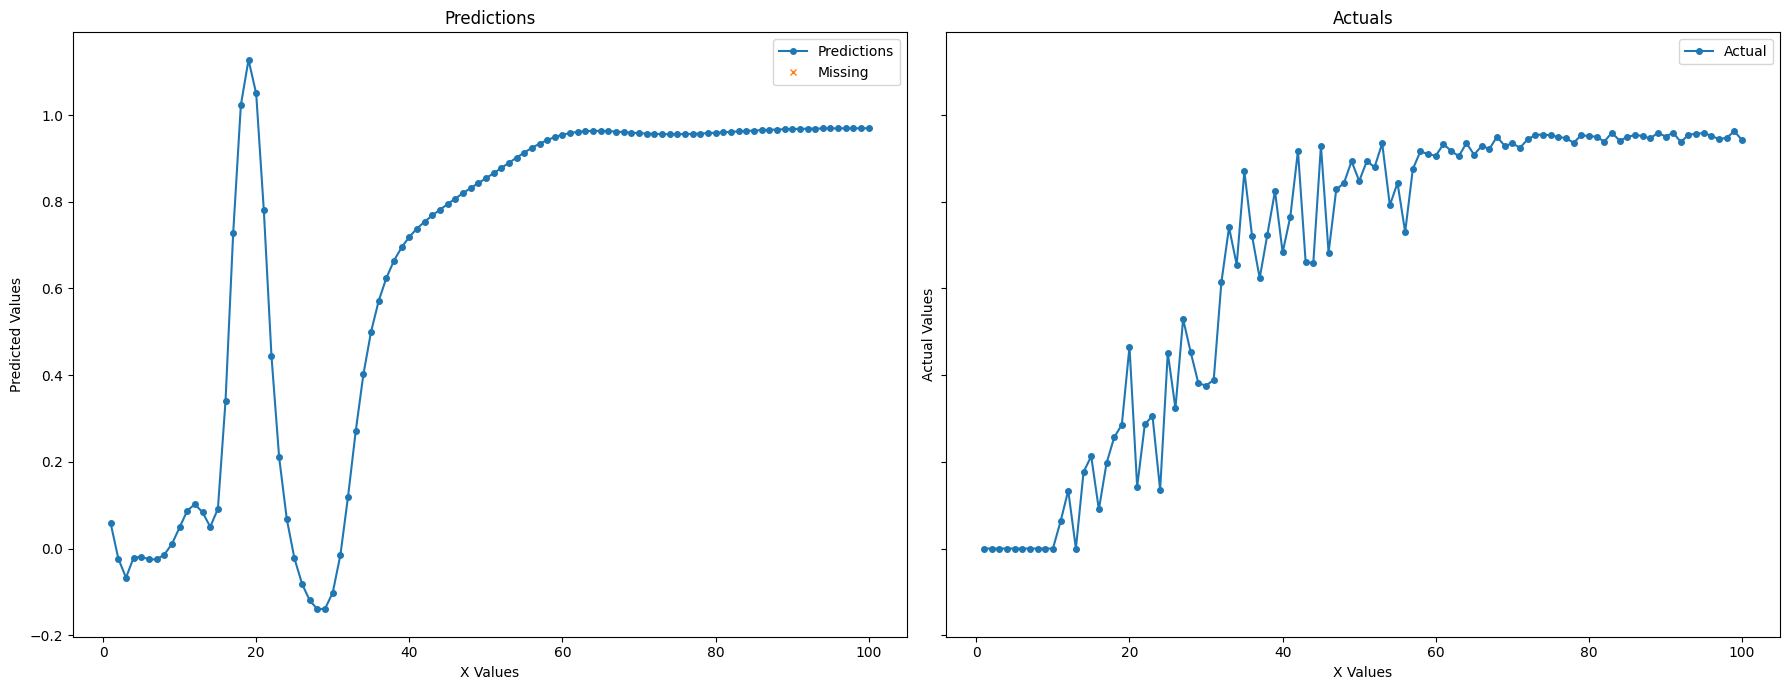

In [85]:
x_set = []
for i in range(1, 101):
    x_set.append([i] + encoded_case_map)
predictions = model.predict(x_set)
case_map_samples = dataset[dataset['Map'] == case_map]
actual = case_map_samples.groupby(["Simulations"]).mean()["Discounted Return"]
print("Average amount each sim tried: ", len(case_map_samples) / len(case_map_samples.groupby(["Simulations"])))
print(case_map_samples.groupby(["Simulations"]).count()["Discounted Return"])
print(case_map_samples.groupby(["Simulations"]).std()["Discounted Return"] / (case_map_samples.groupby(["Simulations"]).count()["Discounted Return"] ** 0.5))
actual_x = actual.index.values
# Share y axis between the two scatterplots
# Share y axis between the two scatterplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18, 7))

# Plot predictions
ax1.plot(range(1, 101), predictions, marker='o', markersize=4, label='Predictions')

# Plot actuals and highlight missing values
ax2.plot(actual_x, actual, marker='o', markersize=4, label='Actual')

missing_indices = np.setdiff1d(np.arange(1, 101), actual_x)
ax1.plot(missing_indices, predictions[missing_indices - 1], 'x', markersize=4, label='Missing')

# Set labels and titles
ax1.set_xlabel('X Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Predictions')

ax2.set_xlabel('X Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Actuals')

# Add legend
ax1.legend()
ax2.legend()
#ax1.ylim([0, 0.4])

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Simulations'>

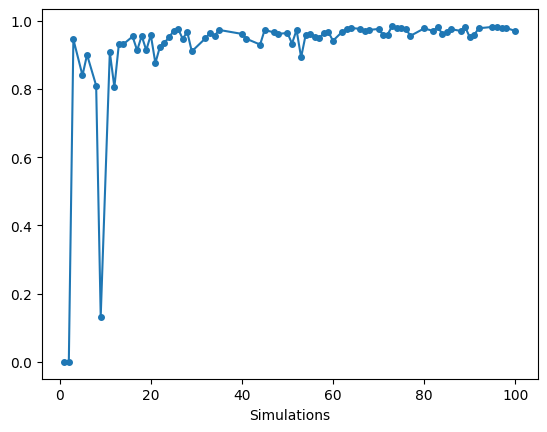

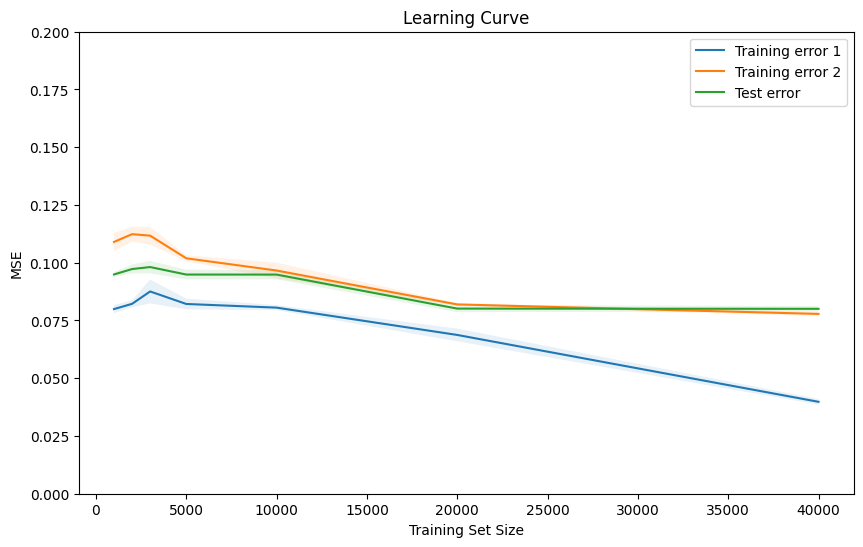

In [14]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train1_mean, label='Training error 1')
plt.plot(train_sizes, train2_mean, label='Training error 2')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([0.0, 0.20])
plt.show()

In [11]:
print(train_mean, train_std, test_mean, test_std)

[0.00000000e+00 2.14702190e-16 2.10826870e-16 4.55845133e-15
 7.77780409e-07 2.69708957e-05 3.81146905e-02 5.49393706e-02
 6.45275582e-02 6.51802651e-02 6.83914609e-02 6.85243081e-02
 7.12151742e-02 6.80887099e-02 6.42353502e-02 6.41943114e-02
 6.68044209e-02 6.84278883e-02 6.96860043e-02 7.22362140e-02] [0.00000000e+00 1.87456638e-18 5.48079409e-18 6.13572921e-15
 3.98679159e-07 2.61982122e-05 2.10927544e-03 5.50174316e-03
 1.73219011e-03 3.03818331e-03 1.53711792e-03 2.05788269e-03
 1.02808108e-03 4.33698388e-04 5.58471508e-04 7.39185021e-04
 6.67304172e-04 4.88120294e-04 3.36222368e-04 5.32103411e-04] [0.22476604 0.21984403 0.17999751 0.22562262 0.15456883 0.1556772
 0.10639668 0.09545906 0.08792098 0.08720874 0.08968134 0.08906839
 0.08394032 0.08229218 0.08252969 0.0813772  0.08166744 0.08276272
 0.0852662  0.07842087] [0.0101751  0.06617633 0.04482506 0.04732252 0.00761723 0.01452601
 0.00352707 0.00195306 0.00031663 0.00051078 0.00301702 0.00184991
 0.00367295 0.00121545 0.00208

## Unique Maps Seen

Unique trainig size: 1
Training error 1: 0.000000 ± 0.000000
Training error 2: 0.000003 ± 0.000002
Test error: 0.335602 ± 0.101633

Unique trainig size: 11
Training error 1: 0.000007 ± 0.000003
Training error 2: 0.002150 ± 0.001304
Test error: 0.180157 ± 0.035080

Unique trainig size: 21
Training error 1: 0.000062 ± 0.000020
Training error 2: 0.013710 ± 0.005357
Test error: 0.154258 ± 0.020446

Unique trainig size: 31
Training error 1: 0.000196 ± 0.000125
Training error 2: 0.016379 ± 0.003982
Test error: 0.127024 ± 0.008445

Unique trainig size: 41
Training error 1: 0.000145 ± 0.000090
Training error 2: 0.025308 ± 0.011191
Test error: 0.130402 ± 0.003451

Unique trainig size: 51
Training error 1: 0.000257 ± 0.000135
Training error 2: 0.029296 ± 0.001814
Test error: 0.127227 ± 0.003369

Unique trainig size: 61
Training error 1: 0.000198 ± 0.000059
Training error 2: 0.035764 ± 0.000999
Test error: 0.117281 ± 0.004498

Unique trainig size: 71
Training error 1: 0.000272 ± 0.000020
Training

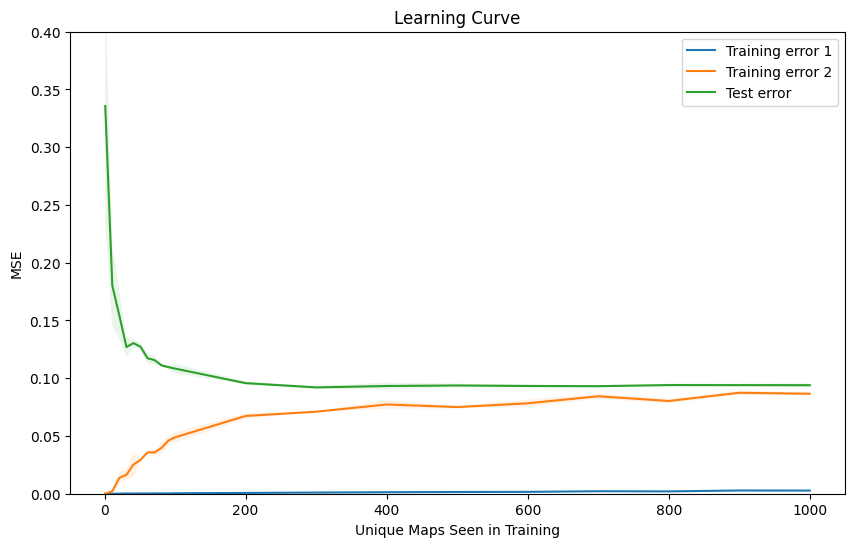

In [10]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)

#Folds
fold = 3

# Train size
training_set_size = 10000

# Unique maps seen in training
unique_train_sizes = list(range(1, 101, 10)) + list(range(100, 1001, 100))
replacement = True

train_scores1 = []
train_scores2 = []
test_scores = []

for unique_train_size in  unique_train_sizes:
    train_scores1.append([])
    train_scores2.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Creating Test Set
        
        train_maps = np.random.default_rng().choice(unique_maps, size=unique_train_size, replace=False)
        test_maps = np.setdiff1d(unique_maps, train_maps)
        #print("Total unique maps?: ", len(train_maps) + len(test_maps))
        test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        test_set_x = []
        test_set_y = []
        for j in range(len(test_set)):
            test_set_x.append([test_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(test_set.index[j][0]), padding)))
            test_set_y.append(test_set[j])

        #Creating Training Set
        training_set = dataset[dataset['Map'].isin(train_maps)]
        training_set_sampled = training_set.sample(n=training_set_size, replace=replacement)
        training_set_x = np.append(training_set_sampled["Simulations"].values.reshape(-1, 1), training_set_sampled['Encoded_Map'].apply(pd.Series).values, axis=1)
        training_set_y = training_set_sampled["Discounted Return"].values

        #print("Maps seen in training: %d" % (len(training_set["Map"].unique())))
        #Creating Training Score 1 Set - Looking only sampled points
        training_score1_set = training_set_sampled.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score1_set_x = []
        training_score1_set_y = []
        for j in range(len(training_score1_set)):
            training_score1_set_x.append([training_score1_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(training_score1_set.index[j][0]), padding)))
            training_score1_set_y.append(training_score1_set[j])
            
        #Creating Training Score 2 Set - Looking all datapoints in the training sample
        training_sampled_unique = training_set_sampled["Map"].unique()
        training_score2_set = training_set[training_set["Map"].isin(training_sampled_unique)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score2_set_x = []
        training_score2_set_y = []
        for i in range(len(training_score2_set)):
            training_score2_set_x.append([training_score2_set.index[i][1]] + encode_maze(training_score2_set.index[i][0]))
            training_score2_set_y.append(training_score2_set[i])


        # print("train score set info: ")
        # a = (training_set.groupby(["Map", "Simulations"]).std()["Discounted Return"] / (training_set.groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(a.mean())
        # print("test set info: ")
        # b = (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).std()["Discounted Return"] / (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(b.mean())
        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            
            #Predicting on training score 1 set
            y_pred = model.predict(training_score1_set_x)
            train_score1 = mean_squared_error(training_score1_set_y, y_pred)
            train_scores1[-1].append(train_score1)
            
            #Predicting on training score 2 set
            y_pred = model.predict(training_score2_set_x)
            train_score2 = mean_squared_error(training_score2_set_y, y_pred)
            train_scores2[-1].append(train_score2)
            
        # print("Fold: %d\nTraining set size: %d\nTraining error: %f\nTest error: %f\n" % (i, training_set_size, train_score, test_score))
    print("Unique trainig size: %d\nTraining error 1: %f ± %f\nTraining error 2: %f ± %f\nTest error: %f ± %f\n" % (unique_train_size, np.mean(train_scores1[-1]), np.std(train_scores1[-1]), np.mean(train_scores2[-1]), np.std(train_scores2[-1]), np.mean(test_scores[-1]), np.std(test_scores[-1])))
        
# Calculate the mean and standard deviation of the training and test scores
train1_mean = np.mean(train_scores1, axis=1)
train1_std = np.std(train_scores1, axis=1)
train2_mean = np.mean(train_scores2, axis=1)
train2_std = np.std(train_scores2, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(unique_train_sizes, train1_mean, label='Training error 1')
plt.plot(unique_train_sizes, train2_mean, label='Training error 2')
plt.plot(unique_train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(unique_train_sizes, train1_mean - train1_std, train1_mean + train1_std, alpha=0.1)
plt.fill_between(unique_train_sizes, train2_mean - train2_std, train2_mean + train2_std, alpha=0.1)
plt.fill_between(unique_train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Unique Maps Seen in Training')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.ylim([0.0, 0.4])
plt.show()

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
